In [1]:
import pandas as pd
import numpy as np
import re

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


# Questão 1

In [2]:
data_url = 'https://raw.githubusercontent.com/valterlucena/ri_lab_01/master/output/results.csv'
news = pd.read_csv(data_url).replace(np.nan, '', regex=True)
total_documents = news.text.count()

toker = RegexpTokenizer(r'\w+')
stopwords = stopwords.words("portuguese")

word_list = []
for new in news.text:
  tokens = [token for token in toker.tokenize(new.lower()) 
            if token not in stopwords and len(token)>= 3 
            and not bool(re.search(r'\d', token))]
  word_list.extend(tokens)

total_word_occurences = len(word_list)
vocabulary_size = len(set(word_list))

words = pd.DataFrame(word_list, columns=['word'])
word_counts = words.word.value_counts().reset_index()
word_counts.columns = ['word', 'freq']
word_counts['r'] = word_counts.freq.rank(ascending=False, method='first')

occurs_mt_thousand = len(word_counts[word_counts.freq > 1000])
occurs_once = len(word_counts[word_counts.freq == 1])

statistics = ['Total documents', 
              'Total word occurences',
              'Vocabulary size',
              'Words occuring > 1000 times',
              'Words occuring once'
             ]

values = [total_documents,
          total_word_occurences,
          vocabulary_size,
          occurs_mt_thousand,
          occurs_once
         ]

result_table = pd.DataFrame(data={'statistics': statistics, 'values': values})
result_table

,statistics,values
0,Total documents,146
1,Total word occurences,33218
2,Vocabulary size,9882
3,Words occuring > 1000 times,0
4,Words occuring once,5501


# Questão 2

In [3]:
word_counts['Pr %'] = round((word_counts.freq / total_word_occurences) * 100, 2)
word_counts['r.Pr'] = round(word_counts.r * word_counts['Pr %'] / 100, 3)
word_counts[0:50]

,word,freq,r,Pr %,r.Pr
0,brasil,203,1.0,0.61,0.006
1,lula,178,2.0,0.54,0.011
2,presidente,170,3.0,0.51,0.015
3,bolsonaro,163,4.0,0.49,0.020
4,governo,144,5.0,0.43,0.022
5,ser,135,6.0,0.41,0.025
6,sobre,118,7.0,0.36,0.025
7,porque,113,8.0,0.34,0.027
8,anos,104,9.0,0.31,0.028
9,pessoas,92,10.0,0.28,0.028


# Questão 3

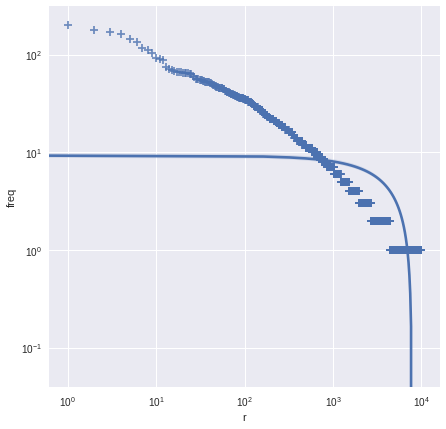

In [4]:
%matplotlib inline

f, ax = plt.subplots(figsize=(7,7))
ax.set(xscale="log", yscale="log")
sns.regplot("r", "freq", word_counts, ax=ax, marker="+", scatter_kws={"s": 50})

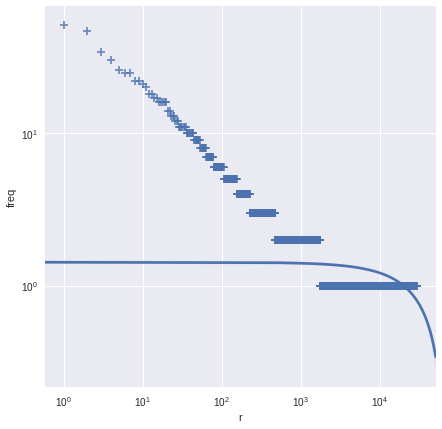

In [5]:
bigram_list = []

for new in news.text:
  tokens = [token for token in toker.tokenize(new.lower()) 
            if token not in stopwords and len(token)>= 3 and not bool(re.search(r'\d', token))]
  bigram_list.extend(list(nltk.bigrams(tokens)))

bigrams_words = [bigram[0] + ' ' + bigram[1] for bigram in bigram_list]

bigrams = pd.DataFrame(bigrams_words, columns=['bigram'])
bigram_counts = bigrams.bigram.value_counts().reset_index()
bigram_counts.columns = ['bigram', 'freq']
bigram_counts['r'] = bigram_counts.freq.rank(ascending=False, method='first')


%matplotlib inline

f, ax = plt.subplots(figsize=(7,7))
ax.set(xscale="log", yscale="log")
sns.regplot("r", "freq", bigram_counts, ax=ax, marker="+", scatter_kws={"s": 50})

# Questao 4

In [6]:
def get_occurrences_count(n):
  return len(word_counts[word_counts.freq == n])

number_of_occurrences = [i for i in range(1, 11, 1)]
predicted_proportion = [round(1.0 / (n*(n+1)), 3) for n in number_of_occurrences]
actual_proportion = [round(get_occurrences_count(n) / vocabulary_size, 3) 
                     for n in number_of_occurrences]
actual_number_words = [get_occurrences_count(n) for n in number_of_occurrences]

columns = ['Number of Occurrences',
           'Predicted proportion',
           'Actual Proportion',
           'Actual Number of Words'
          ]
values = [number_of_occurrences,
         predicted_proportion,
         actual_proportion,
         actual_number_words
         ]
occurrences = pd.DataFrame(data = np.transpose(values), columns=columns)
occurrences

,Number of Occurrences,Predicted proportion,Actual Proportion,Actual Number of Words
0,1.0,0.500,0.557,5501.0
1,2.0,0.167,0.171,1689.0
2,3.0,0.083,0.076,750.0
3,4.0,0.050,0.044,433.0
4,5.0,0.033,0.030,294.0
5,6.0,0.024,0.018,181.0
6,7.0,0.018,0.017,172.0
7,8.0,0.014,0.011,112.0
8,9.0,0.011,0.010,94.0
9,10.0,0.009,0.008,75.0
